In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("/content/drive/My Drive/ColabDataset/InternationalFlightFare.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
size = (19,9)
sns.set_style('darkgrid')

In [ ]:
data.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,InvoiceTime
0,2018-03-12,18850.00,Air,International,15:31:00
1,2018-03-12,20806.00,Air,International,18:51:00
2,2018-04-12,20806.00,Air,International,14:21:00
3,2018-04-12,30557.00,Air,International,18:46:00
4,2018-05-12,796.00,Air,International,11:56:00
5,2018-06-12,8541.11,Air,International,11:26:00
6,2018-06-12,20806.00,Air,International,17:26:00
7,2018-07-12,30037.00,Air,International,18:01:00
8,2018-07-12,41759.00,Air,International,17:32:00
9,2018-07-12,5747.00,Air,International,19:11:00


In [ ]:
data.shape

(9124, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9124 entries, 0 to 9123
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   InvoiceDate    9124 non-null   object 
 1   NetFare        9124 non-null   float64
 2   ProductType    9124 non-null   object 
 3   ItineraryType  9124 non-null   object 
 4   InvoiceTime    9124 non-null   object 
dtypes: float64(1), object(4)
memory usage: 356.5+ KB


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data['InvoiceTime'] = pd.to_timedelta(data['InvoiceTime'].astype(str))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9124 entries, 0 to 9123
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   InvoiceDate    9124 non-null   datetime64[ns] 
 1   NetFare        9124 non-null   float64        
 2   ProductType    9124 non-null   object         
 3   ItineraryType  9124 non-null   object         
 4   InvoiceTime    9124 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), object(2), timedelta64[ns](1)
memory usage: 356.5+ KB


In [ ]:
data.describe()

,NetFare,InvoiceTime
count,9124.000000,9124
mean,14905.957312,0 days 15:38:23.423936
std,10632.281659,0 days 04:28:37.612459
min,0.000000,0 days 00:00:00
25%,6457.500000,0 days 12:59:00
50%,12823.000000,0 days 15:58:00
75%,21493.000000,0 days 18:41:00
max,44000.000000,0 days 23:59:00


In [ ]:
data.describe(include='object').transpose()

,count,unique,top,freq
ProductType,9124,1,Air,9124
ItineraryType,9124,1,International,9124


In [ ]:
data.describe(include='datetime').transpose()

,count,unique,top,freq,first,last
InvoiceDate,9124,392,2019-06-05,97,2018-01-04,2019-12-05


In [ ]:
data.describe(include='timedelta').transpose()

,count,mean,std,min,25%,50%,75%,max
InvoiceTime,9124,15:38:23.423936,04:28:37.612459,0 days,12:59:00,15:58:00,18:41:00,23:59:00


In [ ]:
data = data.sort_values(by=['InvoiceDate'],ascending=True)

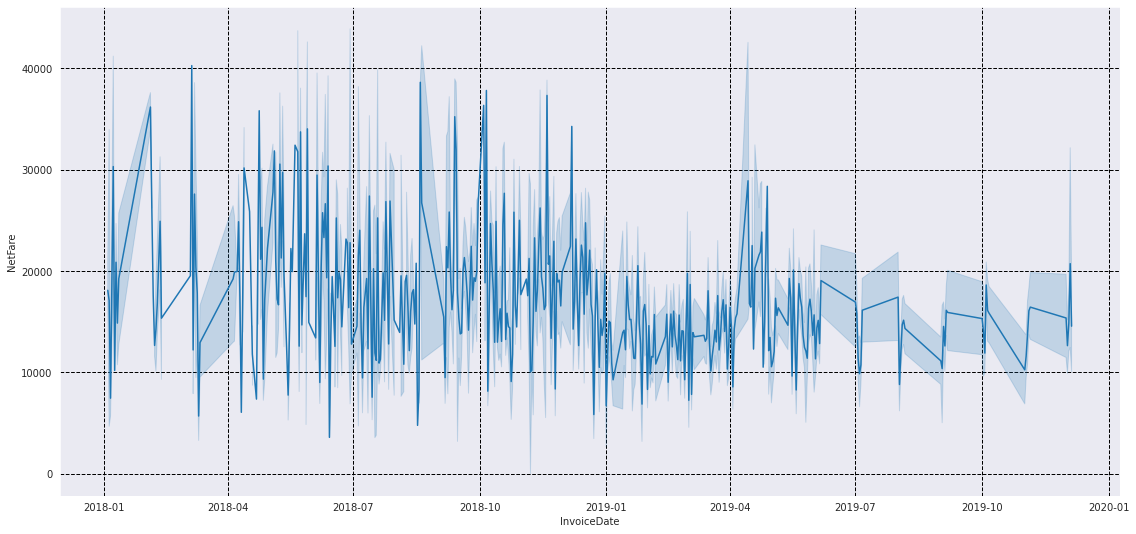

In [ ]:
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='NetFare',data=data)


plt.grid(linewidth=1,linestyle='--',color='black')
plt.show()

In [ ]:
FinalData = pd.DataFrame(columns=data.columns[:-1])

In [ ]:
FinalData.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType


In [ ]:
temp = data.groupby(data['InvoiceDate'].dt.date)[['NetFare']].sum()
temp

,NetFare
InvoiceDate,
2018-01-04,54270.00
2018-01-05,68356.00
2018-01-06,22324.00
2018-01-08,60617.00
2018-01-09,20364.00
...,...
2019-12-01,368644.08
2019-12-02,631386.94
2019-12-03,815912.20


In [ ]:
avgTemp = data.groupby(data['InvoiceDate'].dt.date)[['NetFare']].mean()

avg = avgTemp['NetFare'].values

avg = avg.astype('int64')

In [ ]:
year = temp.index
year = pd.to_datetime(year)

In [ ]:
fare = temp['NetFare']
fare.values.astype('int64')

array([  54270,   68356,   22324,   60617,   20364,  208618,   44563,
         76949,  144748,   78627,   17601,   88532,  242311,   50484,
        323832,   76688,   19532,   40278,   61018,   82782,   81513,
        373895,   45433,  271595,  192097,  119298,  119772,  372941,
        121876,    6047,  207539,  301740,   25861,   47136,    7352,
         87716,   35819,  169256,  194493,   65256,   85860,  177865,
        250183,   31855,  104743,  258459,  133292,  213883,  936362,
        178394,  156590,   12024,   54219,   84689,   22219,   19938,
         32419,   63547,   75481,  236141,   44020,   23673,   69868,
        102095,   14927,   80353,   58937,   26976,   61195,  206024,
        209683,  106567,  173953,  121469,    7146,   27330,   19448,
         75346,   50471,  104107,   39648,  210846,   86890,   23152,
        273479,  245725,   68384,  127806,  116404,   42903,   96091,
        159651,   37774,  180374,  192551,  135510,  246605,   30148,
         60668,   47

In [ ]:
FinalData['InvoiceDate'] = year

In [ ]:
FinalData['NetFare'] = temp['NetFare'].values.astype('int64')

In [ ]:
FinalData['ProductType']='Air'

In [ ]:
FinalData['ItineraryType']= 'International'

In [ ]:
FinalData['AvgNetFare'] = avg

In [ ]:
FinalData.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,AvgNetFare
0,2018-01-04,54270,Air,International,18090
1,2018-01-05,68356,Air,International,17089
2,2018-01-06,22324,Air,International,7441
3,2018-01-08,60617,Air,International,30308
4,2018-01-09,20364,Air,International,10182
5,2018-01-10,208618,Air,International,20861
6,2018-01-11,44563,Air,International,14854
7,2018-01-12,76949,Air,International,19237
8,2018-02-04,144748,Air,International,36187
9,2018-02-05,78627,Air,International,26209


In [ ]:
FinalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceDate    392 non-null    datetime64[ns]
 1   NetFare        392 non-null    int64         
 2   ProductType    392 non-null    object        
 3   ItineraryType  392 non-null    object        
 4   AvgNetFare     392 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 15.4+ KB


In [ ]:
FinalData.head(10)

,InvoiceDate,NetFare,ProductType,ItineraryType,AvgNetFare
0,2018-01-04,54270,Air,International,18090
1,2018-01-05,68356,Air,International,17089
2,2018-01-06,22324,Air,International,7441
3,2018-01-08,60617,Air,International,30308
4,2018-01-09,20364,Air,International,10182
5,2018-01-10,208618,Air,International,20861
6,2018-01-11,44563,Air,International,14854
7,2018-01-12,76949,Air,International,19237
8,2018-02-04,144748,Air,International,36187
9,2018-02-05,78627,Air,International,26209


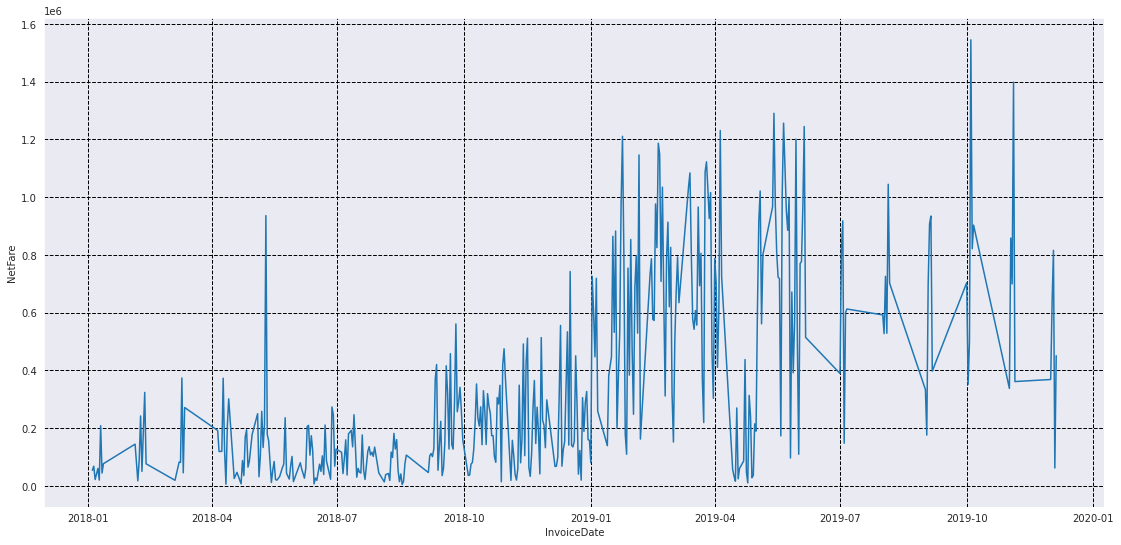

In [ ]:
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='NetFare',data=FinalData)


plt.grid(linewidth=1,linestyle='--',color='black')
plt.show()

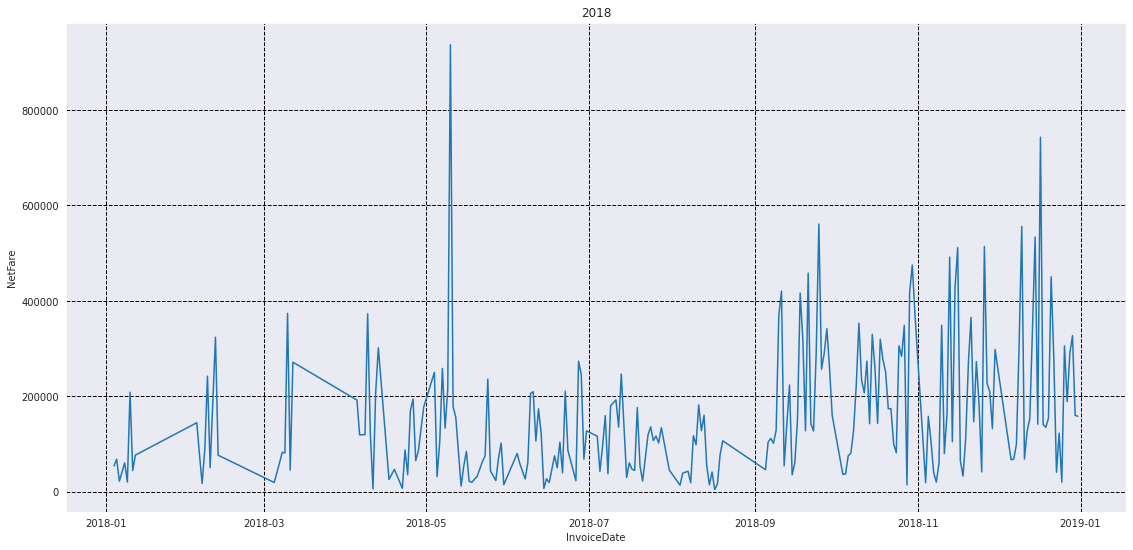

In [ ]:
x = FinalData[FinalData['InvoiceDate'].dt.year==2018]
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='NetFare',data=x)


plt.grid(linewidth=1,linestyle='--',color='black')

plt.title('2018')
plt.show()

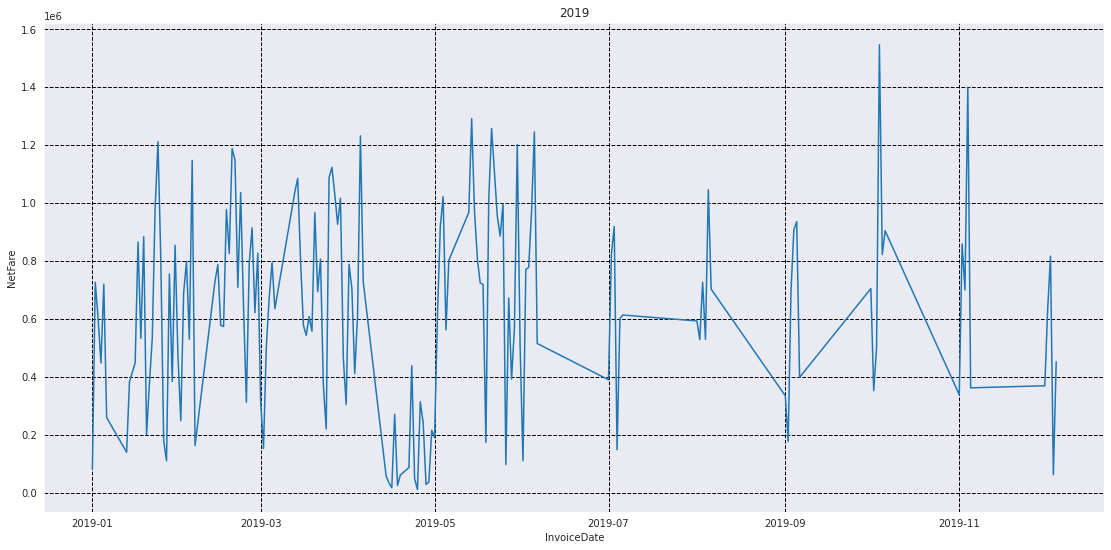

In [ ]:
x = FinalData[FinalData['InvoiceDate'].dt.year==2019]
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='NetFare',data=x)


plt.grid(linewidth=1,linestyle='--',color='black')

plt.title('2019')
plt.show()

In [ ]:
#FinalData.to_csv('/content/drive/My Drive/ColabDataset/TimeSeriesInternationalFlightFare.csv',index=False)

In [ ]:
data2 = FinalData[['InvoiceDate','NetFare','AvgNetFare']]

In [ ]:
data2

,InvoiceDate,NetFare,AvgNetFare
0,2018-01-04,54270,18090
1,2018-01-05,68356,17089
2,2018-01-06,22324,7441
3,2018-01-08,60617,30308
4,2018-01-09,20364,10182
...,...,...,...
387,2019-12-01,368644,15360
388,2019-12-02,631386,12627
389,2019-12-03,815912,14834
390,2019-12-04,62173,20724


In [ ]:
data2.set_index('InvoiceDate',inplace=True)

In [ ]:
data2

,NetFare,AvgNetFare
InvoiceDate,,
2018-01-04,54270,18090
2018-01-05,68356,17089
2018-01-06,22324,7441
2018-01-08,60617,30308
2018-01-09,20364,10182
...,...,...
2019-12-01,368644,15360
2019-12-02,631386,12627
2019-12-03,815912,14834


In [ ]:
data2 = data2.resample('D').ffill().reset_index()

In [ ]:
data2

,InvoiceDate,NetFare,AvgNetFare
0,2018-01-04,54270,18090
1,2018-01-05,68356,17089
2,2018-01-06,22324,7441
3,2018-01-07,22324,7441
4,2018-01-08,60617,30308
...,...,...,...
696,2019-12-01,368644,15360
697,2019-12-02,631386,12627
698,2019-12-03,815912,14834
699,2019-12-04,62173,20724


In [ ]:
len(data2)

701

In [ ]:
data2['InvoiceDate'] = pd.to_datetime(data2['InvoiceDate'])

In [ ]:
data2

,InvoiceDate,NetFare,AvgNetFare
0,2018-01-04,54270,18090
1,2018-01-05,68356,17089
2,2018-01-06,22324,7441
3,2018-01-07,22324,7441
4,2018-01-08,60617,30308
...,...,...,...
696,2019-12-01,368644,15360
697,2019-12-02,631386,12627
698,2019-12-03,815912,14834
699,2019-12-04,62173,20724


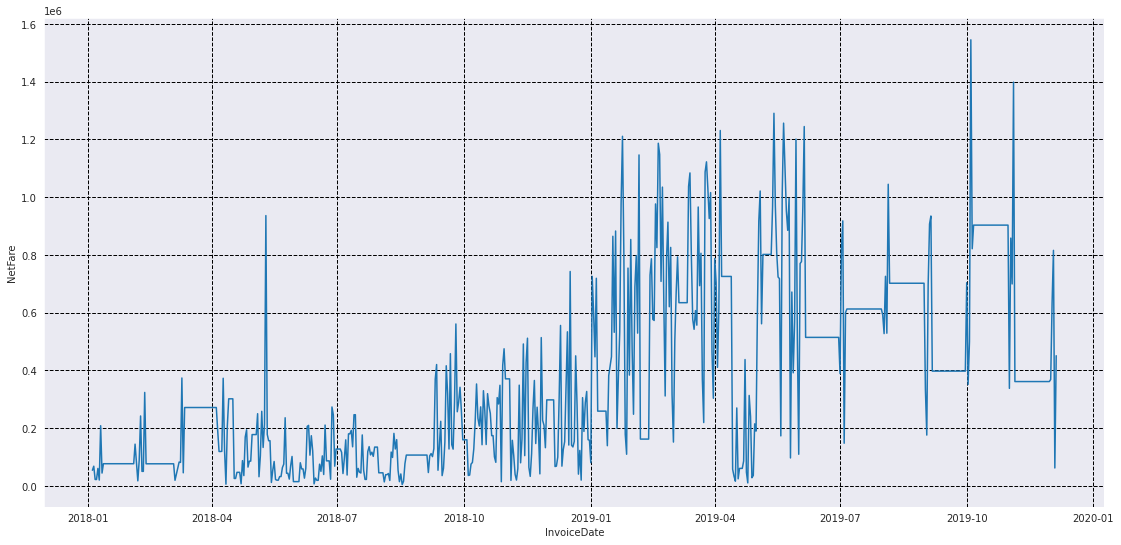

In [ ]:
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='NetFare',data=data2)


plt.grid(linewidth=1,linestyle='--',color='black')
plt.show()

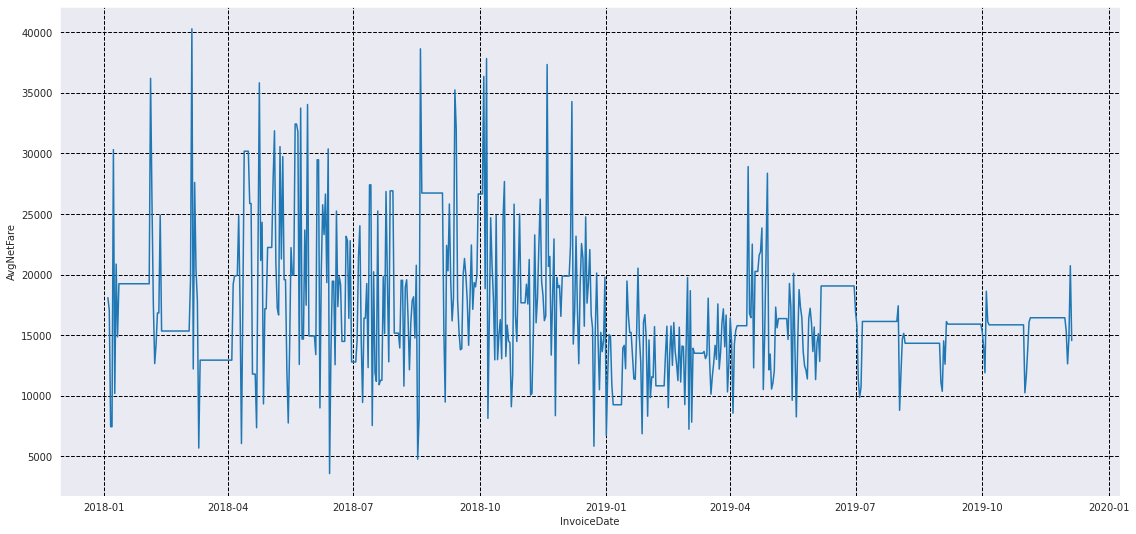

In [ ]:
plt.figure(figsize=size)

sns.lineplot(x='InvoiceDate',y='AvgNetFare',data=data2)


plt.grid(linewidth=1,linestyle='--',color='black')
plt.show()

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceDate  701 non-null    datetime64[ns]
 1   NetFare      701 non-null    int64         
 2   AvgNetFare   701 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 16.6 KB


In [ ]:
data2.describe()

,NetFare,AvgNetFare
count,7.010000e+02,701.000000
mean,3.660056e+05,17023.473609
std,3.081512e+05,5327.935860
min,4.760000e+03,3573.000000
25%,9.981800e+04,14155.000000
50%,2.715950e+05,15997.000000
75%,6.128170e+05,19237.000000
max,1.545130e+06,40278.000000


In [ ]:
#data2.to_csv('/content/drive/My Drive/ColabDataset/FilledTimeSeriesInternationalFlightFare.csv',index=False)

In [ ]:
data2 = pd.read_csv('/content/drive/My Drive/ColabDataset/FilledTimeSeriesInternationalFlightFare.csv')
data2.tail()

,InvoiceDate,NetFare,AvgNetFare
696,2019-12-01,368644,15360
697,2019-12-02,631386,12627
698,2019-12-03,815912,14834
699,2019-12-04,62173,20724
700,2019-12-05,451056,14550
